# <center> Identifying Pulsar Stars Using Radio Waves

## <center> Introduction

### 1. Background

Neutron stars are formed when massive stars run out of fuel and collapse under their gravity, expelling all particles from the star except neutrons. Due to this, neutron stars are very dense (One sugar cube of neutron star material would weigh about 1 billion tonnes) [1]. 

Unfortunately, many neutron stars are undetected as they don't emit enough radiation to be detected. Pulsars are the most observed neutron stars because they have pulses of radiation at regular intervals that range from milliseconds to seconds. This occurs due to their powerful magnetic field that funnels jets of particles at accelerated speeds along their two magnetic poles, resulting in a potent beam of light. When this beam of light crosses our line of sight, we see a pulse [2].

### 2. Scientific Importance of Pulsar Stars

Pulsar stars have played a critical role in research since they were discovered over 50 years ago. Using precision measurements, scientists have used their unique properties for experiments at the forefront of modern physics, such as confirming many predictions from Alberta Einstein's theory of General Relativity [3]. Another critical breakthrough due to pulsar stars was the discovery of the very first planets outside our solar system. With the discovery of gravitational waves and future development in space technology, pulsar stars will play an even more critical role in our future understanding of the universe.

### 3. Significance of Project


In the future, we face challenges in space navigation as we start exploring deep space. To solve this, NASA has developed a new GPS like system for space, that uses pulsar as a point of reference, called X-ray pulsar navigation [4]. This technology is critical to explore deep space, especially for autonomous spacecraft,  as this will allow them to conduct real-time maneuvering in distant areas of our solar system based on independent coordinates. 
In addition, as scientists look for pulsars with specific characteristics to test various hypotheses, by analyzing just our identified pulsar stars, scientists will be able to focus there better search, increasing the rate of such discoveries. Also, for the X-ray pulsar navigation systems, it gets more effective with more data points. 


### 4. Research Question

Given the radio emission of a star, how can we predict if this star is a pulsar or not.


### 5. Summary of Dataset 

We used the dataset pulsar_stars.csv, from the given website, https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star [5].
This dataset consists of potential Pulsar star candidates. Each candidate is described by 8 continuous variables(numerical):
Mean of the integrated profile,
Standard deviation of the integrated profile,
Excess kurtosis of the integrated profile,
Skewness of the integrated profile,
Mean of the DM-SNR curve,
Standard deviation of the DM-SNR curve,
Excess kurtosis of the DM-SNR curve,
Skewness of the DM-SNR curve,
and a single categorical variable, Class with two levels.

 ##    <center> **Methods & Result**

### 1. Loading libraries

We started by loading the necessary libraries for our analysis.

In [3]:
library(tidyverse)
library(dplyr)
library(caret)
library(forcats)
library("GGally")
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



### 2. Loading Data From Original Source

Next, we downloaded the original dataset from Kaggle and unzipped the file on a local computer. The unzipped file was uploaded to Google Drive, and we got the sharable link. We used the read_csv function to read the tabular data directly from the URL contains the dataset.

In [4]:
orig_data <- read_csv("https://drive.google.com/uc?export=download&id=1JQNz_vuMVPGNl7_1fcJog7oyi61K7og6")

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)


### 3. Wrangling and Cleaning the Data

We cleaned and wrangled the data to move it from its raw format into a format that is suitable for classification analysis.

#### 3.0 Checking Tidy Data

Using the head function, we inspected the content of the dataset to examine if our dataset consisted of tidy data. 

Our data satisfies the three criteria for tidy data, as each row is a single observation, each column is a single variable, and each value is in a single cell. As the data is tidy, we did not have to clean it up [6].

In [8]:
head(orig_data)

Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


#### 3.1 Converting Categorical Label to Factor


The make.names function is used to ensure syntactically valid column names to facilitate future analysis. More importantly, we see that the target_class label is of type double. As target_class will we a categorical statistical variable, we use the as.factor function to convert this variable to factor.

In [6]:
colnames(orig_data) <- make.names(colnames(orig_data))
pulsar_data <- orig_data %>%
    mutate(target_class = as.factor(target_class))

#### 3.2 Splitting the Data

The createDataPartitionfunction was used to split the data into a training and testing set, with 75% of the data used for training and 25% for testing. As the createDataPartition function uses random sampling to choose which rows will be in the training set, we used the set.seed function to ensure our code is reproducible each time it is run (generates the same train/test split).

In [7]:
set.seed(2020)
training_rows <- pulsar_data %>%
    unlist() %>%
    createDataPartition(p = 0.75, list=FALSE)

training_set <- pulsar_data %>% slice(training_rows)
testing_set <- pulsar_data %>% slice(-training_rows)

#### 3.3 Standardizing the Data

The glimpse function was used to to preview the trainig set data frame.

In [6]:
glimpse(training_set)

Observations: 13,402
Variables: 9
$ Mean.of.the.integrated.profile               <dbl> 140.56250, 103.01562, 13…
$ Standard.deviation.of.the.integrated.profile <dbl> 55.68378, 39.34165, 57.1…
$ Excess.kurtosis.of.the.integrated.profile    <dbl> -0.234571412, 0.32332836…
$ Skewness.of.the.integrated.profile           <dbl> -0.69964840, 1.05116443,…
$ Mean.of.the.DM.SNR.curve                     <dbl> 3.1998328, 3.1212375, 3.…
$ Standard.deviation.of.the.DM.SNR.curve       <dbl> 19.110426, 21.744669, 20…
$ Excess.kurtosis.of.the.DM.SNR.curve          <dbl> 7.975532, 7.735822, 6.89…
$ Skewness.of.the.DM.SNR.curve                 <dbl> 74.24222, 63.17191, 53.5…
$ target_class                                 <fct> 0, 0, 0, 0, 0, 0, 0, 0, …


As we used the K-nearest neighbor algorithm in our classification analysis, the scale of each variable matters. Since the classifier predicts classes by identifying observations that are nearest to it, any variables that have a large scale (in this data set, Mean of the integrated profile, Standard deviation of the integrated profile, and Skewness of the DM-SNR curve) will have a much larger effect than variables with a small scale (in this data set, Excess kurtosis of the integrated profile, Skewness of the integrated profile, and Mean of the DM-SNR curve). Just because a variable has a large scale doesn't mean that it is more important for making accurate predictions.

Therefore, we decided to standardize the original unscaled data before the classification analysis. We use the preProcess function to create an object used to standardize the dataset, and the standardization results in the predictors having a mean of 0 and a standard deviation of 1. Then, we use the predict function to apply the data transformation to both our training data set and testing data set.


In [7]:
scale_transformer <- preProcess(training_set, method = c("center", "scale")) 

sd_training_set <- predict(scale_transformer, training_set)
sd_testing_set <- predict(scale_transformer, testing_set)

### 4. Performing a Summary of the Relevant Data Set 

As part of the exploratory data analysis, we created a table to summarize the training data [Table 1]. In this table, the first column shows that there are two categories in our training data, which corresponds to our proposed question for this project: whether a star is a pulsar star or not. 

The second and third columns show that there are 12221 observations, 
which represent 91% of the training data for non-pulsar stars and 1213 observations, which represent 9% of the training data for pulsar stars. And the last column shows that there are not any rows in the training data which have missing data. We do not include the means of the predictor variables in our summary table as it's difficult to interpret those statistics and not very useful for our further analysis.

In [8]:
pulsar_table <- sd_training_set %>%
    mutate(na_count = apply(sd_training_set, 1, function(x) sum(is.na(x)))) %>%
    group_by(target_class) %>% 
    summarize(number = n(),
              percentage = n() / nrow(training_set) * 100,
              na_count = sum(na_count))
cat("Table 1: Summary of Data Set")
pulsar_table

Table 1: Summary of Data Set

target_class,number,percentage,na_count
<fct>,<int>,<dbl>,<int>
0,12178,90.867035,0
1,1224,9.132965,0


### 5.  Visualization of the Dataset

As part of the exploratory data analysis, we used the ggpairs function from the GGally library to visualize the distributions of each of the predictor variables in our training data set [Figure 1].    

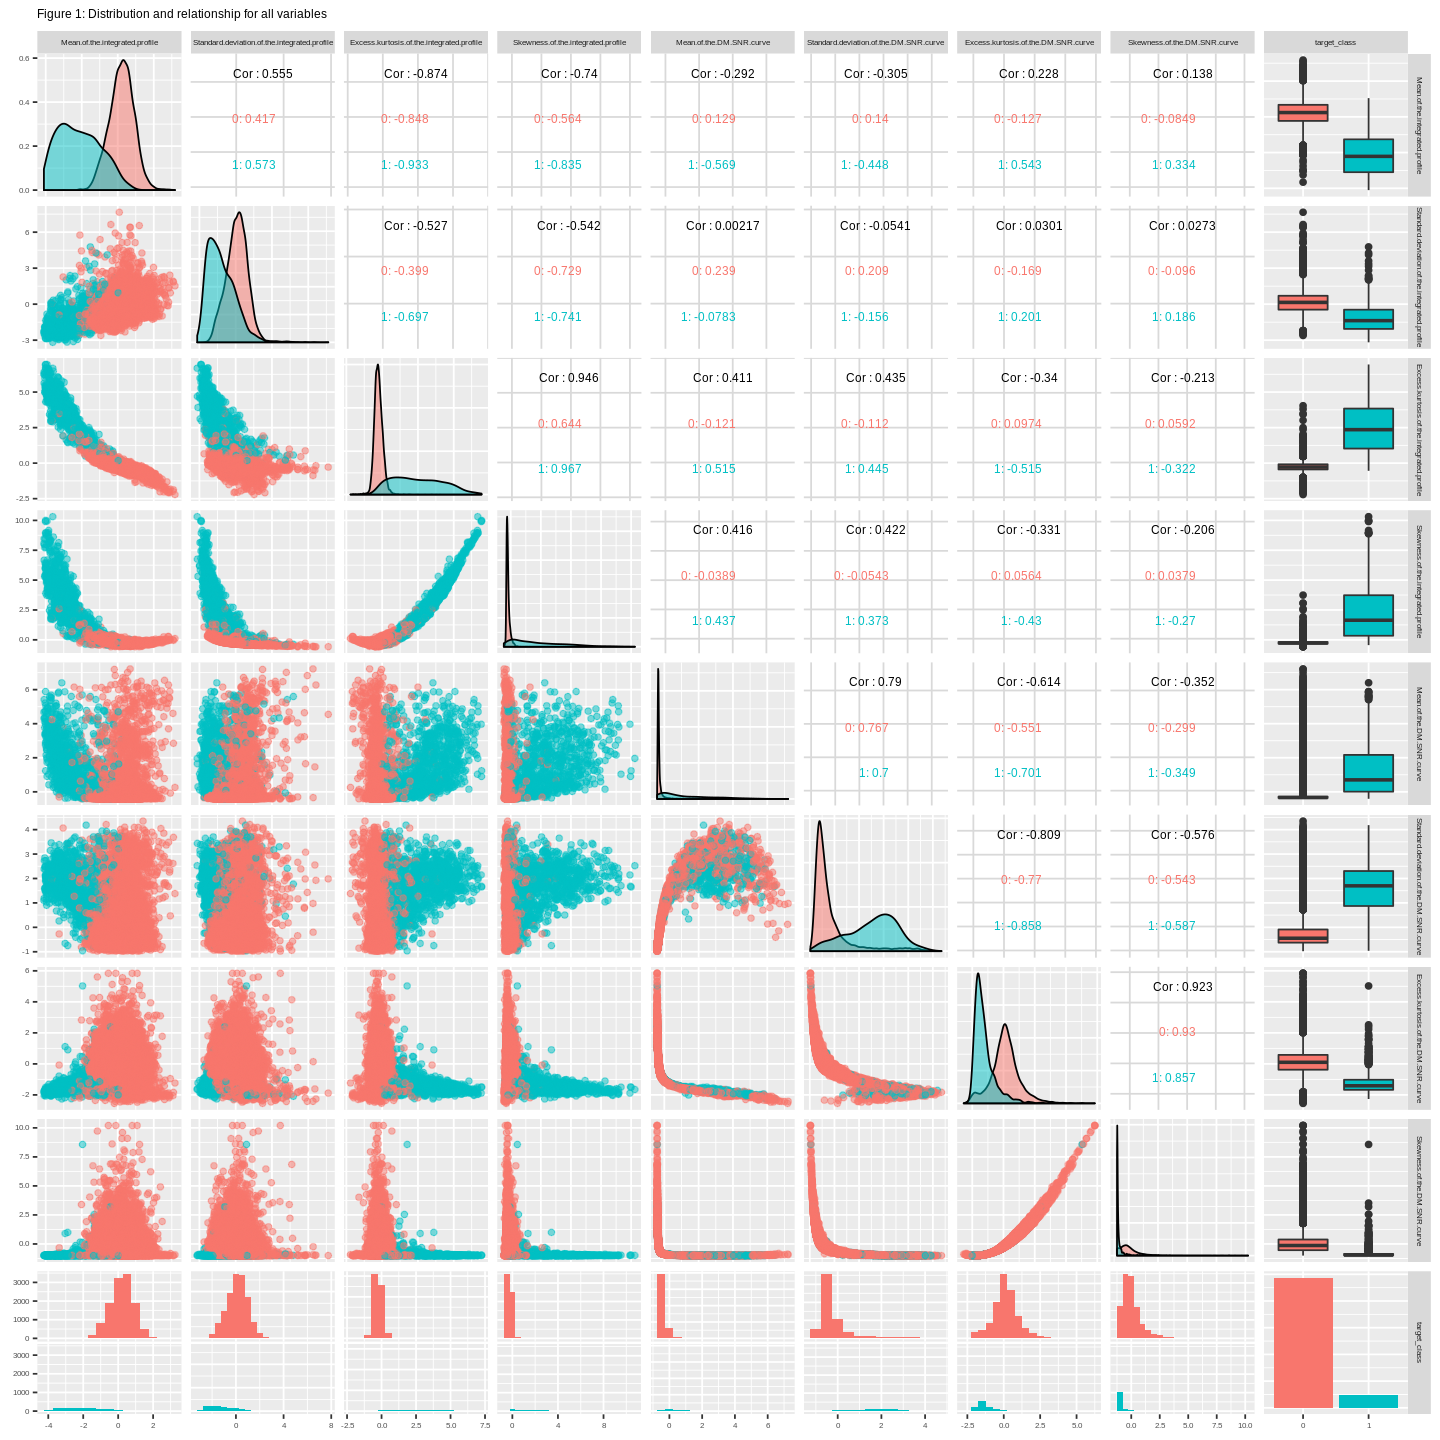

In [9]:
options(repr.plot.width = 12, repr.plot.height = 12)
pulsar_plot <- ggpairs(data = sd_training_set, mapping=ggplot2::aes(colour = target_class), 
        upper = list(continuous = wrap("cor", size = 2.5)),
        lower = list(continuous = wrap("points", alpha = 0.5), combo=(wrap("facethist", binwidth = 0.5))),
        diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
        title = "Figure 1: Distribution and relationship for all variables") +
        theme(text = element_text(size=6))
pulsar_plot

To assist in the selection of predictors for our classification model, we extract the histogram plots at the bottom row [Figure 1.1] to see the distribution of each variable and whether it can help us distinguish each class well. From these plots, we can see that the second, seventh, and eighth variables have a relatively similar shape of the distribution for each class. Likewise, we can see that these three variables have relatively large overlapped areas between both classes from the diagonal plots [Figure 1.2]. Therefore, we decided to opt-out standard deviation of the integrated profile, excess kurtosis of the DM-SNR curve, and skewness of the DM-SNR curve.

In contrast, we think that the third variable should be a good predictor because we can see from the histogram that the distribution of each class is very different and from the density graph that the overlapped area is relatively small, which may work well in separating two different classes. 

Besides, this ggpairs graph gives us some intuition that the first and sixth predictors are relatively good predictors based on the distribution shape of each class in the histogram. Also, the fourth and fifth predictors are relatively good predictors based on small overlaps in the density graph.

However, while the ggpairs are helpful, we do not think there is decisive information for selecting the predictors, and thus, we will try to build different models with different predictor combinations to get the one with the best accuracies in the next section.


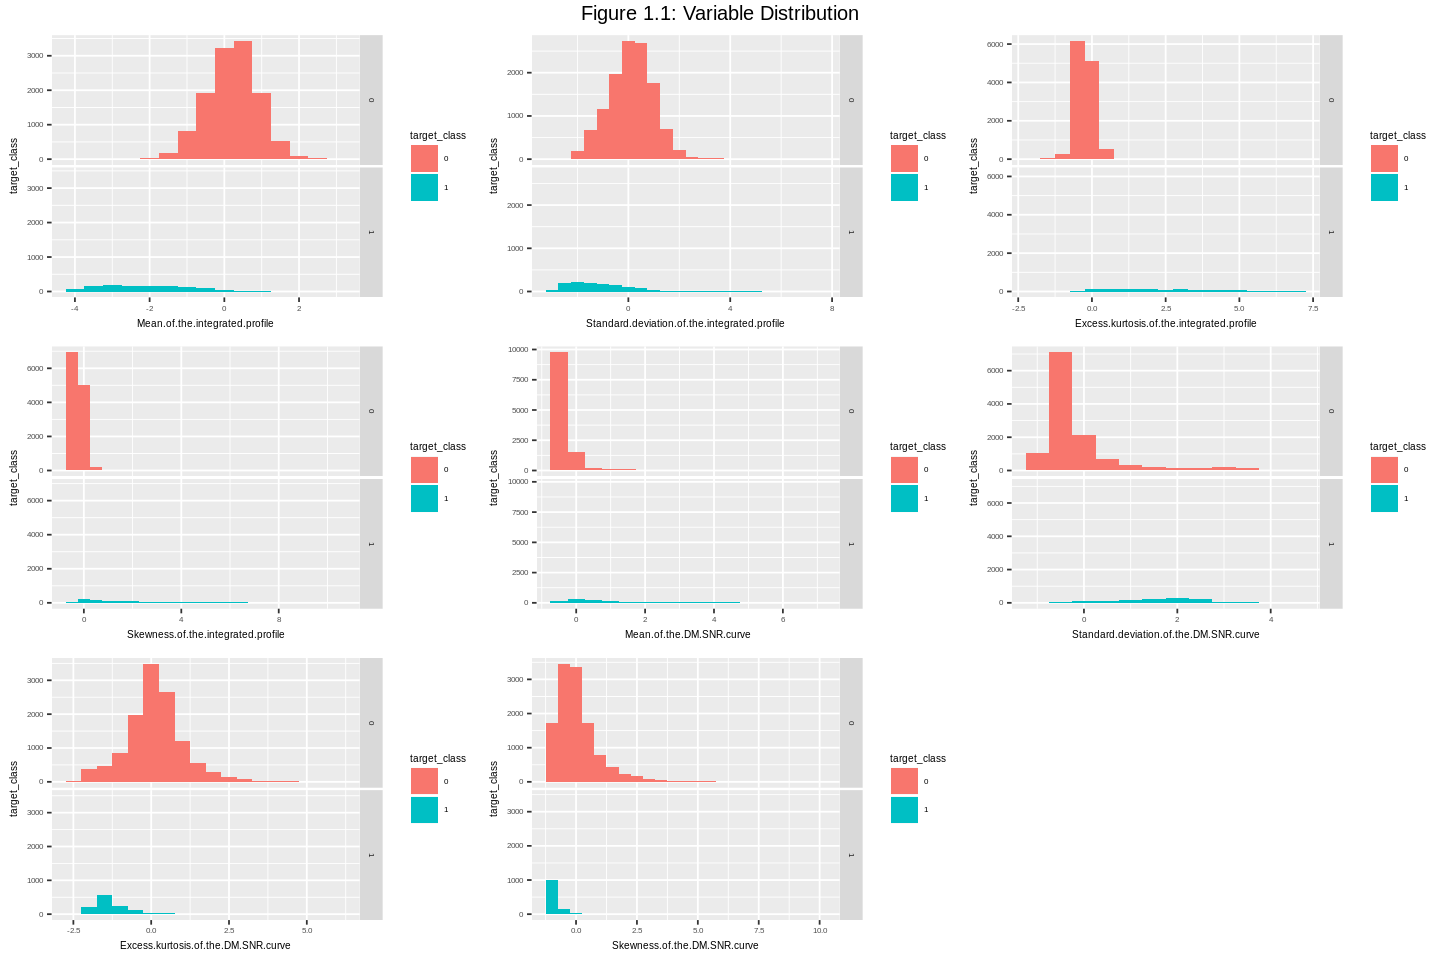

In [10]:
options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(getPlot(pulsar_plot, 9, 1), getPlot(pulsar_plot, 9, 2), getPlot(pulsar_plot, 9, 3),
             getPlot(pulsar_plot, 9, 4), getPlot(pulsar_plot, 9, 5), getPlot(pulsar_plot, 9, 6),
             getPlot(pulsar_plot, 9, 7), getPlot(pulsar_plot, 9, 8), ncol=3, nrow = 3, top = "Figure 1.1: Variable Distribution")

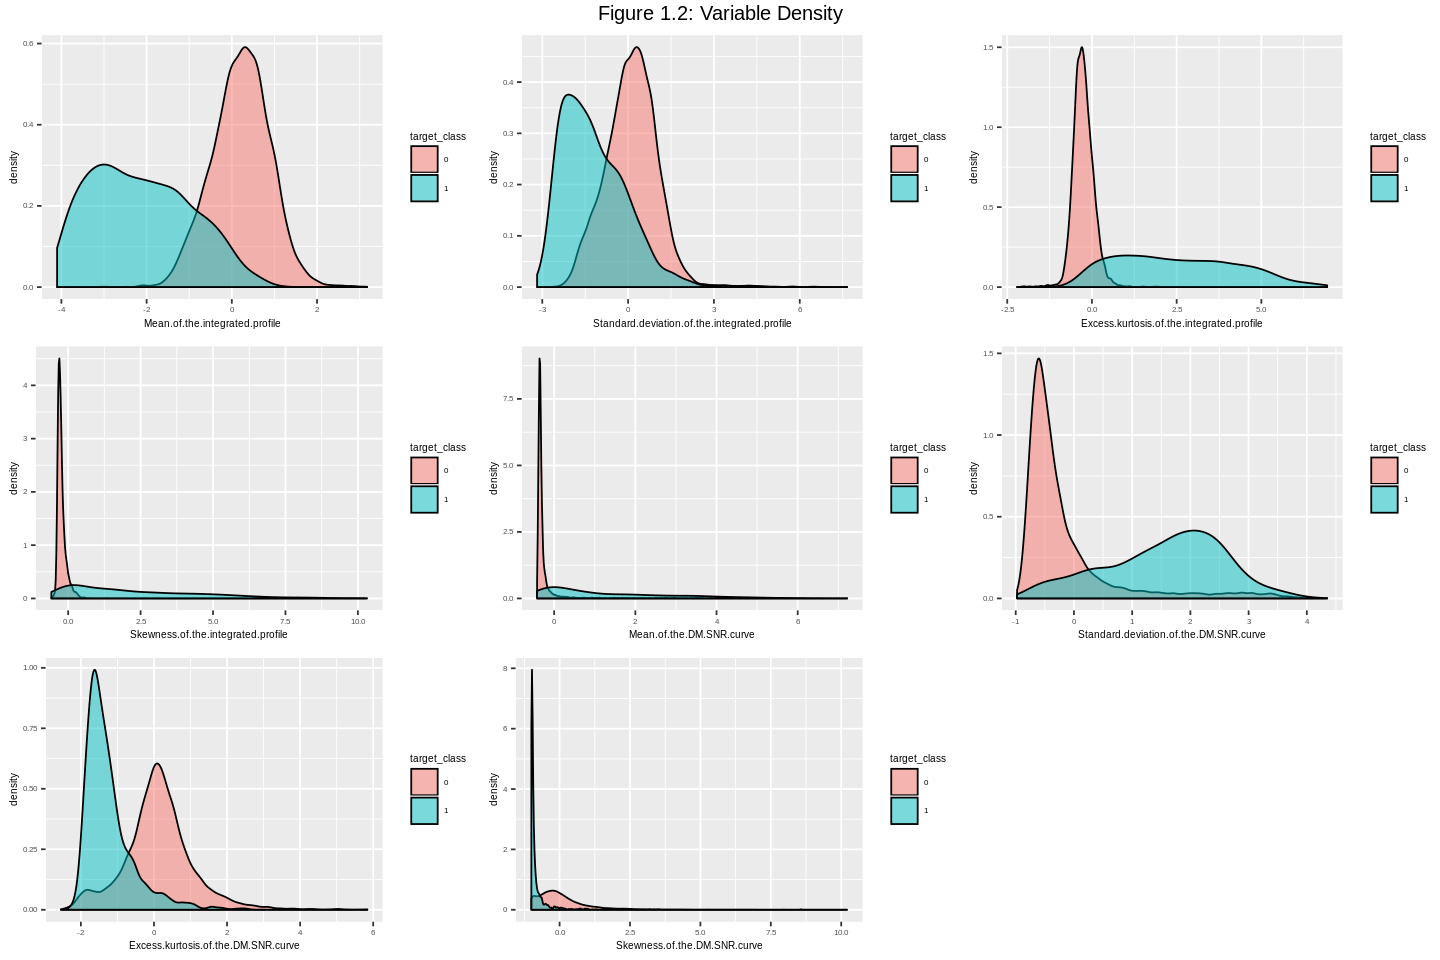

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(getPlot(pulsar_plot, 1, 1), getPlot(pulsar_plot, 2, 2), getPlot(pulsar_plot, 3, 3),
             getPlot(pulsar_plot, 4, 4), getPlot(pulsar_plot, 5, 5), getPlot(pulsar_plot, 6, 6),
             getPlot(pulsar_plot, 7, 7), getPlot(pulsar_plot, 8, 8), ncol=3, nrow = 3, top = "Figure 1.2: Variable Density")

We also extracted the scatter plot six from the top and five from the left [Figure 1.3], where we notice that the combination of the fifth and sixth variables have the largest overlaps among all those lower scatter plots. Therefore, we decided to opt-out of all the combinations of the mean of the DM-SNR curve and the standard deviation of the DM-SNR curve.


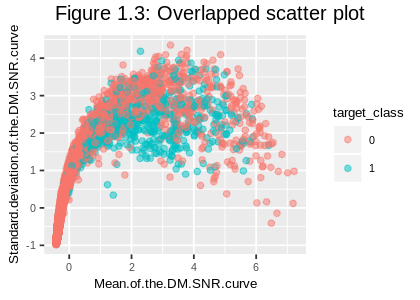

In [12]:
options(repr.plot.width = 3.5, repr.plot.height = 2.5)
grid.arrange(pulsar_plot[6, 5] +
        theme(text = element_text(size=8)), ncol=1, nrow = 1, top = "Figure 1.3: Overlapped scatter plot")

### 6. Performing a Classification Analysis

#### 6.0 Algorithm Selection

We used the classification algorithms in which one or more quantitative variables to predict the value of a categorical variable, which in our case is if a neutron star is a pulsar or not. The K-nearest neighbor algorithm is used by first finding the best K points in the training data nearest to the new observation, and then returning the majority class vote from those training observations.

#### 6.1 Choosing Predictors and the K-Value

To maximize the performance of our final classification model, we built different K-nearest neighbour classifiers with varying combinations of predictor variables with different k parameter values.

From the exploratory data analysis, we narrowed down the predictor selections to the first, third, fourth, fifth, and sixth variables and opt-out of any combinations of the fifth and sixth variables. Considering the astronomy context of our dataset, the cost of collecting data for these observations should be high. Bear this in mind; we exhausted all possible combinations of predictors in a total of eighteen to optimize the accuracy of our classifier. These combinations vary from two predictors to five predictors.


The code block below builds eighteen X_train data frame with different combination of predictors for the train function.

In [13]:
var_1 <- "Mean.of.the.integrated.profile"
var_3 <- "Excess.kurtosis.of.the.integrated.profile"
var_4 <- "Skewness.of.the.integrated.profile"
var_5 <- "Mean.of.the.DM.SNR.curve"
var_6 <- "Standard.deviation.of.the.DM.SNR.curve"

Y_train <- sd_training_set %>% 
  select(target_class) %>% 
  unlist()

X_train_13 <- sd_training_set %>% select(var_1, var_3) %>% data.frame()
X_train_14 <- sd_training_set %>% select(var_1, var_4) %>% data.frame()
X_train_15 <- sd_training_set %>% select(var_1, var_5) %>% data.frame()
X_train_16 <- sd_training_set %>% select(var_1, var_6) %>% data.frame()
X_train_34 <- sd_training_set %>% select(var_3, var_4) %>% data.frame()
X_train_35 <- sd_training_set %>% select(var_3, var_5) %>% data.frame()
X_train_36 <- sd_training_set %>% select(var_3, var_6) %>% data.frame()
X_train_45 <- sd_training_set %>% select(var_4, var_5) %>% data.frame()
X_train_46 <- sd_training_set %>% select(var_4, var_6) %>% data.frame()
X_train_134 <- sd_training_set %>% select(var_1, var_3, var_4) %>% data.frame()
X_train_135 <- sd_training_set %>% select(var_1, var_3, var_5) %>% data.frame()
X_train_136 <- sd_training_set %>% select(var_1, var_3, var_6) %>% data.frame()
X_train_145 <- sd_training_set %>% select(var_1, var_4, var_5) %>% data.frame()
X_train_146 <- sd_training_set %>% select(var_1, var_4, var_6) %>% data.frame()
X_train_345 <- sd_training_set %>% select(var_3, var_4, var_5) %>% data.frame()
X_train_346 <- sd_training_set %>% select(var_3, var_4, var_6) %>% data.frame()
X_train_1345 <- sd_training_set %>% select(var_1, var_3, var_4, var_5) %>% data.frame()
X_train_1346 <- sd_training_set %>% select(var_1, var_3, var_4, var_6) %>% data.frame()

We implemented cross-validation to choose the best number of neighbours in our K-nearest neighbour classifier. To better evaluate the accuracy of our classifier, we split our overall training data set further into two subsets, the training set and validation set in multiple different ways, in 10 chunks. We use the trainControl function to help build 10-fold cross-validation. To calculate the accuracies of different values of k, we build a data frame with k values from 1 to 100 in steps of 5. 

Then, we pass the train_control object and k data frame into the train function, which handles creating the chunks, doing multiple rounds of training and evaluation, and averaging the results for us. In this way, we obtained accuracy for each value of k for each predictor combination, and then pick the predictors and the value of k that gives us the best accuracy. This givesa us some confidence that our final classifier will perform well when it predicts new observations.

The code block below builds the train_control object for cross-validation and a vector of values for K for tuning the classifier.

In [14]:
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = seq(from = 1, to = 100, by = 5))

The code block below builds different k-nearest neighbour models.

In [15]:
set.seed(2020)
model_knn_13 <- train(x = X_train_13, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_14 <- train(x = X_train_14, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_15 <- train(x = X_train_15, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_16 <- train(x = X_train_16, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_34 <- train(x = X_train_34, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_35 <- train(x = X_train_35, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_36 <- train(x = X_train_36, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_45 <- train(x = X_train_45, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_46 <- train(x = X_train_46, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_134 <- train(x = X_train_134, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_135 <- train(x = X_train_135, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_136 <- train(x = X_train_136, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_145 <- train(x = X_train_145, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_146 <- train(x = X_train_146, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_345 <- train(x = X_train_345, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_346 <- train(x = X_train_346, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_1345 <- train(x = X_train_1345, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
model_knn_1346 <- train(x = X_train_1346, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)

The code block below gets the calculated accuracies from the classifiers built above.

In [16]:
accuracies_13 <- model_knn_13$results %>% select(k, P_13 = Accuracy)
accuracies_14 <- model_knn_14$results %>% select(P_14 = Accuracy)
accuracies_15 <- model_knn_15$results %>% select(P_15 = Accuracy)
accuracies_16 <- model_knn_16$results %>% select(P_16 = Accuracy)
accuracies_34 <- model_knn_34$results %>% select(P_34 = Accuracy)
accuracies_35 <- model_knn_35$results %>% select(P_35 = Accuracy)
accuracies_36 <- model_knn_36$results %>% select(P_36 = Accuracy)
accuracies_45 <- model_knn_45$results %>% select(P_45 = Accuracy)
accuracies_46 <- model_knn_46$results %>% select(P_46 = Accuracy)
accuracies_134 <- model_knn_134$results %>% select(P_134 = Accuracy)
accuracies_135 <- model_knn_135$results %>% select(P_135 = Accuracy)
accuracies_136 <- model_knn_136$results %>% select(P_136 = Accuracy)
accuracies_145 <- model_knn_145$results %>% select(P_145 = Accuracy)
accuracies_146 <- model_knn_146$results %>% select(P_146 = Accuracy)
accuracies_345 <- model_knn_345$results %>% select(P_345 = Accuracy)
accuracies_346 <- model_knn_346$results %>% select(P_346 = Accuracy)
accuracies_1345 <- model_knn_1345$results %>% select(P_1345 = Accuracy)
accuracies_1346 <- model_knn_1346$results %>% select(P_1346 = Accuracy)

To compare the accuracies from different knn models and for different values of k, we used the bind_cols functions to combine the Accuracy columns in different models, and then used the gather function to make the accuracy data tidy.

The code block below builds a tidy data frame for the calculated accuracies.

In [17]:
accuracies <- bind_cols(accuracies_13, accuracies_14, accuracies_15, accuracies_16, accuracies_34, accuracies_35, 
                        accuracies_36, accuracies_45, accuracies_46, accuracies_134, accuracies_135, accuracies_136,
                        accuracies_145, accuracies_146, accuracies_345, accuracies_346, accuracies_1345, accuracies_1346)
accuracies_tidy <- gather(accuracies, key = Predictors, value = Accuracies, 
                          P_13, P_14, P_15, P_16, P_34, P_35, 
                          P_36, P_45, P_46, P_134, P_135, P_136, 
                          P_145, P_146, P_345,P_346, P_1345, P_1346)

Our goal is to choose the predictor combination with its k value that provides the highest accuracy. The first step is to get the predictor combinations that give us relatively high prediction accuracies. 

To compare the maximum accuracies for each predictor combination, we visualized the values of max accuracy for each combination with a bar chart [Figure 2]. However, the maximum values across all combinations are very close to each other, so a bar chart is not very good at determining the best predictors. Further, we created a table [Table 2] to get the top five predictor combinations in terms of the best accuracy they can achieve.


The code blocks below uses the group_by, summarise, arrange and head function to get the top five predictor combinations [Table 2]. 

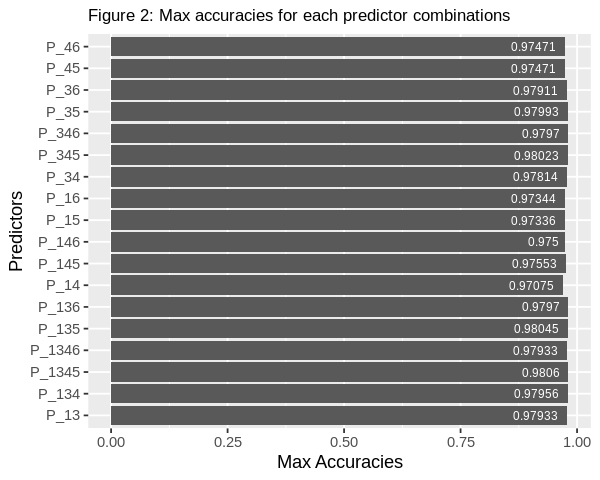

In [18]:
accuracies_max <- accuracies_tidy %>% 
    group_by(Predictors) %>% 
    summarise(Max = max(Accuracies)) %>% 
    arrange(desc(Max))

options(repr.plot.width = 5, repr.plot.height = 4)
accuracy_vs_k_max <- ggplot(accuracies_max, aes(x=Predictors, y=Max)) +
    geom_bar(stat = "identity") +
    labs(x="Predictors", y="Max Accuracies") +
    coord_flip() +
    geom_text(aes(label=round(Max,5)), hjust=1.2, size=2.5, colour="white") +
    ggtitle("Figure 2: Max accuracies for each predictor combinations") +
    theme(plot.title = element_text(size = 10))
accuracy_vs_k_max

In [19]:
cat("Table 2: Top 5 Predictors with max accuracies")
head(accuracies_max, 5)

Table 2: Top 5 Predictors with max accuracies

Predictors,Max
<chr>,<dbl>
P_1345,0.9806001
P_135,0.9804501
P_345,0.9802271
P_35,0.9799294
P_136,0.9797047


The next step gives us the value of k, which has the highest prediction accuracy.

The code block below uses the filter function to get the top five predictor combinations and then plots their accuracies versus k with five different lines [Figure 3].

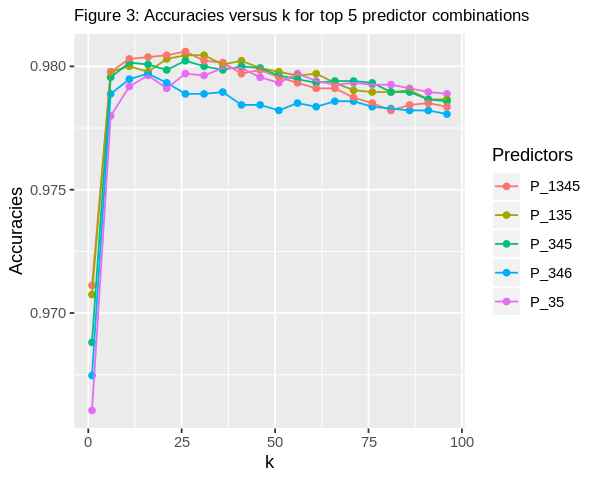

In [20]:
accuracies_top <- accuracies_tidy %>% 
    filter(Predictors == "P_135" | Predictors == "P_1345" | Predictors == "P_345" 
           | Predictors == "P_35" | Predictors == "P_346")

options(repr.plot.width = 5, repr.plot.height = 4)
accuracy_vs_k_lots <- ggplot(accuracies_top, aes(x=k, y=Accuracies, colour = Predictors)) +
    geom_point() +
    geom_line() +
    labs(x="k", y="Accuracies") +
    ggtitle("Figure 3: Accuracies versus k for top 5 predictor combinations") +
    theme(plot.title = element_text(size = 10))
accuracy_vs_k_lots

The code block below returns the statistics and suggestion of the best k for the knn model using the third and the fifth predictor variables.

In [21]:
model_knn_35

k-Nearest Neighbors 

13402 samples
    2 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 12061, 12062, 12062, 12061, 12061, 12062, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9660513  0.7938012
   6  0.9779893  0.8620884
  11  0.9791832  0.8682400
  16  0.9796309  0.8707980
  21  0.9791084  0.8677112
  26  0.9797054  0.8713605
  31  0.9796309  0.8705576
  36  0.9799294  0.8722452
  41  0.9799293  0.8718404
  46  0.9795563  0.8692754
  51  0.9793323  0.8676120
  56  0.9797055  0.8698148
  61  0.9794069  0.8677207
  66  0.9792576  0.8666436
  71  0.9793323  0.8670789
  76  0.9792577  0.8664495
  81  0.9792577  0.8664495
  86  0.9791085  0.8654967
  91  0.9789592  0.8643056
  96  0.9788847  0.8638756

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 36.

In this section, we have created the following to help us choose predictors and k values to optimize the performance of our classifier: 
* [Table 2]: The top five predictor combinations with max accuracies 
* [Figure 2]: The maximum accuracies across all combinations
* [Figure 3]: The accuracies versus k values for the top five predictors
    
By looking at these tables and visualizations, we can see that:
* The differences among various predictor combinations, particularly the max accuracies among the top five predictors, are relatively subtle
* The accuracies increase the most from k=1 to k=6 then fluctuate little when k>6

Therefore, we decided to use Excess kurtosis of the integrated profile and Mean of the DM.SNR curve as our predictors and choose k=36 number of neighbours to make the majority vote for new observations for the following reasons:
* We selected two predictors which ranked as the fourth from the top five predictor combinations table because the difference of max accuracies between this selection and the top one combination is trivial around 0.07%. This means that adding the extra two predictors does not sufficiently increase the prediction accuracy.
* We selected two predictors rather than four predictors because it is easy for us to visualize the classification analysis and thus easy for us to interpret our results as well as easy for the reader to understand our analysis.
* We choose the k value as 36 because it gives us the highest accuracy from the cross-validation evaluation. There is not any underfitting or overfitting issue by selecting this value of k.
* We have discussed the selection of two variables rather than four variables with one of our TAs Jordan.


#### 6.2 Training the Classifier

Finally, we created our k-nearest neighbour classifier by choosing the number K of neighbours to be 36, and using Excess kurtosis of the integrated profile and Mean of the DM-SNR curve as the predictors. 

In [22]:
k = data.frame(k = 36)

set.seed(2020)
model_knn_final <- train(x = X_train_35, y = Y_train, method = "knn", tuneGrid = k)

#### 6.3 Predicting Labels in the Test Set

Now, we used our classifier to predict the class labels for our testing set and assess our classifier’s accuracy.

The code block below uses the predict function to predict the labels of the new observations in our testing data set.

In [23]:
X_test <- sd_testing_set %>% 
  select(var_3, var_5) %>% 
  data.frame()

Y_test_predicted <- predict(object = model_knn_final, X_test)

Y_test <- sd_testing_set %>% 
  select(target_class) %>% 
  unlist()

#### 6.4 Computes the Accuracy

The code block below uses the confusionMatrix function to get the statistics about the quality of our model. From a value of accuracy of around 0.9778, we can say that our K-nearest neighbour classifier predicted the correct class label on roughly 97.78% of the examples.

In [24]:
model_quality <- confusionMatrix(data = Y_test_predicted, reference = Y_test)
model_quality

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4063   82
         1   18  333
                                         
               Accuracy : 0.9778         
                 95% CI : (0.973, 0.9819)
    No Information Rate : 0.9077         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8574         
                                         
 Mcnemar's Test P-Value : 2.976e-10      
                                         
            Sensitivity : 0.9956         
            Specificity : 0.8024         
         Pos Pred Value : 0.9802         
         Neg Pred Value : 0.9487         
             Prevalence : 0.9077         
         Detection Rate : 0.9037         
   Detection Prevalence : 0.9219         
      Balanced Accuracy : 0.8990         
                                         
       'Positive' Class : 0              
                                         

### 7. Visualization of Classification Results

In this section, we created four visualizations to show our classification results.  

Firstly, we created a visualization with ggpairs to show how the selected two predictors contribute to the final prediction result [Figure 3]. The density plots from the diagonal line show us although there are some overlap areas, the majority of non-pulsar stars have lower values of both excess kurtosis of the integrated profile ("EKIP") and mean of the DM-SNR curve ("MDSC"). In comparison, the pulsar stars have higher values of these variables. 

From the histogram in the bottom row, we can see that for non-pulsar stars, there is a wider spread-out of the mean of the DM-SNR curve though the number of non-pulsar with higher mean of the DM-SNR curve is relatively small. Therefore, we would like to say the two selected variables distinguish two classes by:  
* identifying stars with lower values of EKIP and lower values of MDSC as non-pulsar
* identifying stars with higher values of EKIP and higher or lower values of MDSC as pulsar
* identifying stars with lower values of EKIP and higher values of MDSC is not very decisive and may have some misclassification because there are some stars of either type have high values of MDSC.

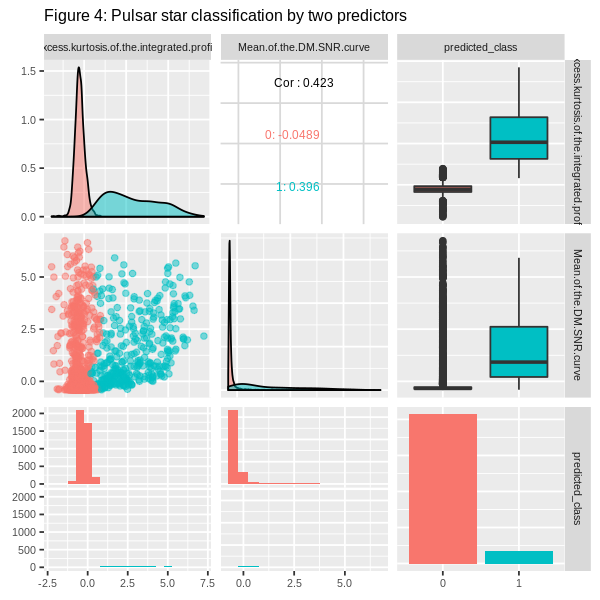

In [25]:
predicted_data <- sd_testing_set %>%
    select(Excess.kurtosis.of.the.integrated.profile, Mean.of.the.DM.SNR.curve) %>%
    bind_cols(data.frame(predicted_class = Y_test_predicted))

options(repr.plot.width = 5, repr.plot.height = 5)
predicted_plot <- ggpairs(data = predicted_data, mapping=ggplot2::aes(colour = predicted_class), 
        upper = list(continuous = wrap("cor", size = 2.5)),
        lower = list(continuous = wrap("points", alpha = 0.5), combo=(wrap("facethist", binwidth = 0.5))),
        diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
        title = "Figure 4: Pulsar star classification by two predictors") +
        theme(text = element_text(size=8))
predicted_plot

Secondly, we created two scatter plots for the classifications with both predictors, the left one with the predicted class and the right with the original class [Figure 5]. This was done to see if there's an obvious difference between the predicted and the original class. We can see that certain points at the same position from two plots have different colors, which means that our classification is not consistent with the original one for that observation. However, these points are mostly located at the boundary area where the majority of non-pulsar stars and pulsar stars are located. Overall, the predicted classification is very similar to the original one, which also indicates our classification model has done a good job.


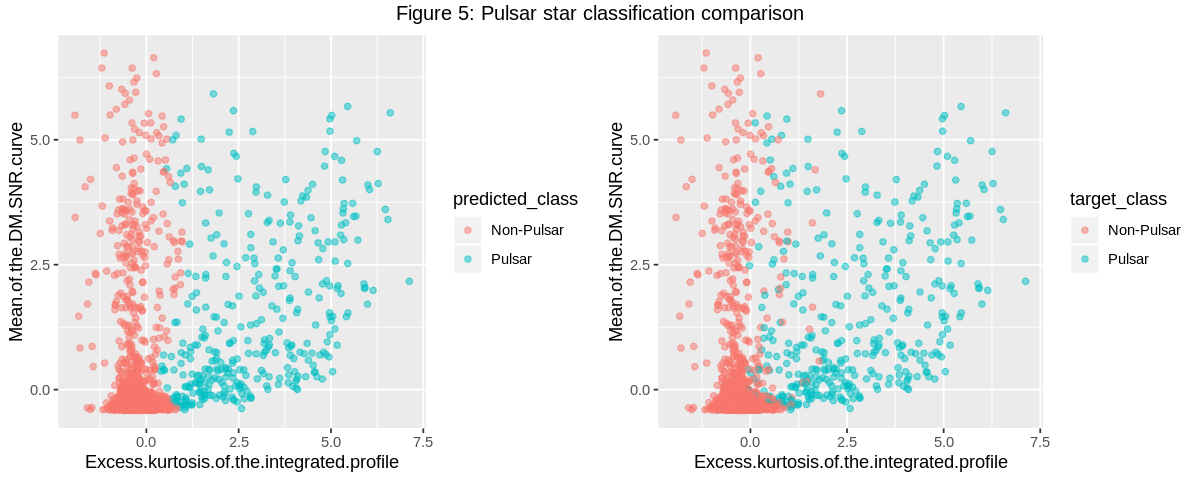

In [26]:
orig_class_data <- sd_testing_set %>%
    select(Excess.kurtosis.of.the.integrated.profile, Mean.of.the.DM.SNR.curve, target_class)

orig_class_plot <- orig_class_data %>% 
    ggplot(aes(x=Excess.kurtosis.of.the.integrated.profile, y=Mean.of.the.DM.SNR.curve)) +
    geom_point(aes(colour=target_class), alpha=0.5) +
    labs(x="Excess.kurtosis.of.the.integrated.profile", y="Mean.of.the.DM.SNR.curve") +
    scale_color_manual(labels = c("Non-Pulsar", "Pulsar"), values= c("#f8766d", "#00bfc4"))

predicted_class_plot <- predicted_data %>% 
    ggplot(aes(x=Excess.kurtosis.of.the.integrated.profile, y=Mean.of.the.DM.SNR.curve)) +
    geom_point(aes(colour=predicted_class), alpha=0.5) +
    labs(x="Excess.kurtosis.of.the.integrated.profile", y="Mean.of.the.DM.SNR.curve") +
    scale_color_manual(labels = c("Non-Pulsar", "Pulsar"), values= c("#f8766d", "#00bfc4"))

options(repr.plot.width = 10, repr.plot.height = 4)
grid.arrange(predicted_class_plot, orig_class_plot, ncol=2, nrow=1, top = "Figure 5: Pulsar star classification comparison")

Thirdly, we created another scatter plot to look into the details of our prediction results [Figure 5]. We separated the prediction results into four categories: 1) predict non-pulsar star as non-pulsar; 2) predict pulsar star as pulsar; 3) predict non-pulsar star as pulsar; 4) predict pulsar star as non-pulsar. The first and the second cases are correct predictions, while the third and the fourth cases are incorrect predictions. Considering that scientists are interested in researching pulsar stars, we believe the third result type (predict non-pulsar stars as pulsars) is the most severe wrong case. We can see from the figure that the number of this third type is larger than the other wrong prediction types. This might cause scientists to spend efforts in researching these false positives causing precious resources to be wasted. The fourth result type (predict pulsar stars as non-pulsar stars) as missed pulsar stars. This is not as severe as the third case because from the figure we see the number of such cases is relatively small. As scientists still have more than enough pulsar stars to work on, the overall impact of this false negative is mitigated.

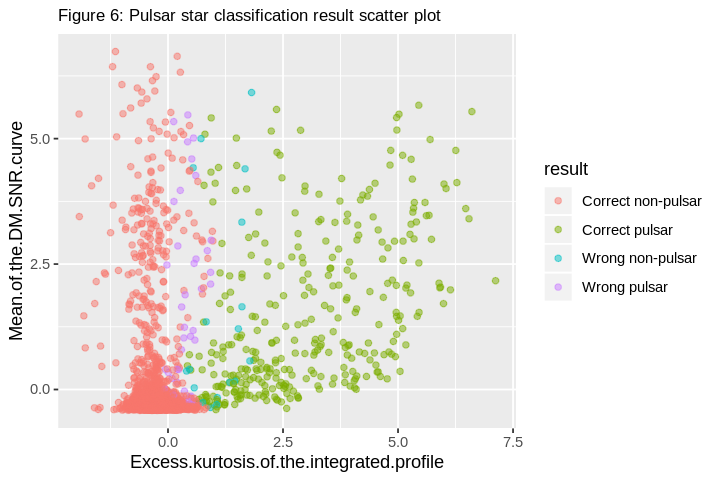

In [27]:
result_data <- orig_class_data %>%
    bind_cols(data.frame(predicted_class = Y_test_predicted)) %>%
    mutate(result = case_when(target_class == 0 & predicted_class == 0 ~ "Correct non-pulsar",
                              target_class == 1 & predicted_class == 1 ~ "Correct pulsar",
                              target_class == 0 & predicted_class == 1 ~ "Wrong non-pulsar",
                              target_class == 1 & predicted_class == 0 ~ "Wrong pulsar"))

options(repr.plot.width = 6, repr.plot.height = 4)
result_plot <- result_data %>% 
    ggplot(aes(x=Excess.kurtosis.of.the.integrated.profile, y=Mean.of.the.DM.SNR.curve)) +
    geom_point(aes(colour=result), alpha=0.5) +
    labs(x="Excess.kurtosis.of.the.integrated.profile", y="Mean.of.the.DM.SNR.curve") +
    ggtitle("Figure 6: Pulsar star classification result scatter plot") +
    theme(plot.title = element_text(size = 10))

result_plot

Finally, we created two bar charts to see the correct versus wrong prediction for both classes [Figure 6]. From the left stacked bar chart, we can see that the percentage of correct predictions for non-pulsar stars is larger than the one for pulsar stars. From the bar chart to the right , we can see that the number of wrong predictions for non-pulsar stars is smaller than the one for pulsar stars.


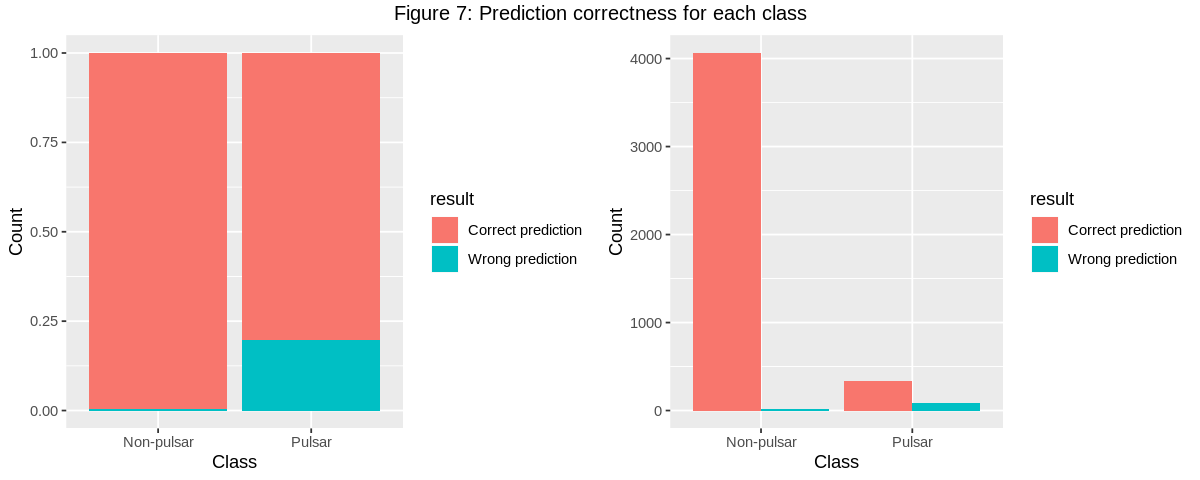

In [28]:
result_stat <- result_data %>% 
    mutate(result = case_when(target_class == predicted_class ~ "Correct prediction",
                              target_class != predicted_class~ "Wrong prediction")) %>% 
    group_by(target_class, result) %>% 
    summarize(number = n())

options(repr.plot.width = 5, repr.plot.height = 3.5)
result_stat_plot <- ggplot(result_stat, aes(x=target_class, y=number, fill=result)) +
    geom_bar(stat = "identity", position = "fill") +
    labs(x="Class", y="Count") +
    scale_x_discrete(labels=c("Non-pulsar", "Pulsar"))

result_stat_plot2 <- ggplot(result_stat, aes(x=target_class, y=number, fill=result)) +
    geom_bar(stat = "identity", position=position_dodge()) +
    labs(x="Class", y="Count") +
    scale_x_discrete(labels=c("Non-pulsar", "Pulsar"))

options(repr.plot.width = 10, repr.plot.height = 4)
grid.arrange(result_stat_plot, result_stat_plot2, ncol=2, nrow=1, top = "Figure 7: Prediction correctness for each class")

Based on the classification analysis above, we have confidence that our classification model can help the scientists to predict pulsar stars using their excess kurtosis of the integrated profile and mean of the DM-SNR curve efficiently and accurately.

 ## <center> **Discussion**

### 1. Summary of Results 

We choose Excess kurtosis of the integrated profile and Mean of the DM.SNR curve as our predictors and did a K-nn classification
to the data set pulsar_stars.csv, here is what we found.

#### From Figure 4, we find:

* The scatter plot of Excess kurtosis of the integrated profile for the pulsar is further apart from the scatter plot for non-pulsar.

* The scatter plot of Mean of the DM.SNR curve for the pulsar is further apart from the scatter plot for non-pulsar.

* The Majority points for pulsar on the scatter plot is further apart from the points for non-pulsar.


#### From Figure 7, we find:

* The correct prediction(predict non-pulsar stars as non-pulsar and predict pulsar stars as a pulsar) is far more than the incorrect prediction(predict non-pulsar stars as pulsar and predict pulsar stars as non-pulsar).


### 2. Expectation

 Our results support our expectation. If the emission of the radio is from a pulsar, the Mean of the integrated profile and Excess kurtosis of the integrated profile should follow the same distribution.

The scatter plot of Excess kurtosis of the integrated profile for the pulsar is further apart from the scatter plot for non-pulsar; The scatter plot of Mean of the DM.SNR curve for the pulsar is further apart from the scatter plot for non-pulsar; The Majority points for pulsar on the scatter plot is further apart from the points for non-pulsar; meaning that it is easier to see where the different types are distributed, so it makes sense to use those variables.

The correct prediction(predict non-pulsar stars as non-pulsar and predict pulsar stars as a pulsar) is far more probably than the incorrect prediction(predict non-pulsar stars as pulsar and predict pulsar stars as non-pulsar), the accuracy of using the model above to predict whether a candidate is a pulsar is high.

With these findings, we can conclude that classification prediction for whether a star is a pulsar or not by using the above model is effective. 


#### About class imbalance:

We might not upsample the training data in our data preprocessing. There is no problem with not upsampling because distributions are very separate; also, the k value(36) is not that large. However, we should keep the drawbacks of class imbalance in mind during our classification analysis. We will upsample the data in the future.


### 3.  Impacts of Results 

Given that we can use our model to classification predict if a certain star is a pulsar, we may use this new way to identify pulsar stars that can use used for scientific research. In the future, if we get similar data, we may focus on those two variables. We can try to see if the Mean of the DM-SNR curve and Excess kurtosis of the integrated profile should follow the same distribution as our result, to preliminarily classify if a pulsar causes the given radio emission or not. This will significantly reduce the time and effort that astronomers have to spend to identify pulsar stars. This is because we could use software to make sure that they conduct further analysis of stars that have the highest probability of being pulsar stars, saving both time and resources. This will be particularly helpful in future deep space exploration and research into gravitational waves [3],[4].

### 4. Limitations


#### Drawbacks of class imbalance:

We also notice that another potential issue in our data set is a class imbalance, given that in our training data, 91% of the observations are not classified as pulsar stars, while only 9% of the observations are classified as pulsar stars. Because the K-nearest neighbour algorithm uses the labels of nearby points to predict the label of a new observation point, if there are many more data points of non-pulsar stars, the algorithm is more likely to pick this label in general. In our training data set, pulsar star is the rare "unimportant" class, which might potentially lead to "unfair" predictions in our classification analysis. Besides, when we do upsampling, we replicate the existing observations of the rare class. This may affect our cross-validation and make our estimation over-optimistic.

### 5.Questions for the Future

* If there are other variables that are decisive factors in classifying if the given radio emission is caused by a pulsar or not.
* Can we use machine learning to identify other objects in space such as black holes?
* If we can use other forms of radiation from stars such as ultraviolet rays etc. also to predict star type.

## <center> Citations 

[1] “Neutron Stars, Pulsars, and Magnetars - Introduction,” NASA. [Online]. Available: https://imagine.gsfc.nasa.gov/science/objects/neutron_stars1.html. [Accessed: 08-Apr-2020].

[2] A. Sundermier, “Five extreme facts about neutron stars,” symmetry magazine. [Online]. Available: https://www.symmetrymagazine.org/article/five-extreme-facts-about-neutron-stars. [Accessed: 08-Apr-2020].

[3] “NRAO: National Radio Astronomy Observatory,” Pulsars: The Universe's Gift to Physics. [Online]. Available: https://www.nrao.edu/pr/2012/aaaspulsars/. [Accessed: 08-Apr-2020].

[4] R. Gonzalez, “NASA Can Use Pulsars to Navigate Deep Space. Where to Now?,” Wired. [Online]. Available: https://www.wired.com/story/nasa-just-proved-it-can-navigate-space-using-pulsars-where-to-now/. [Accessed: 08-Apr-2020].

[5] P. Raj, “Predicting a Pulsar Star,” Kaggle, 09-May-2018. [Online]. Available: https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star. [Accessed: 08-Apr-2020].

[6] T. A. Timbers, T. Campbell, and M. Lee, Introduction to Data Science.[Online]. Available:https://ubc-dsci.github.io/introduction-to-datascience/. [Accessed: 08-Apr-2020]